# Monte Carlo updating for tree topologies

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm

sys.path.append('../ready functions in py/')

%load_ext autoreload
%autoreload 2


from iterative_BOT_solver import iterative_bot_solver
from tree_growing_heuristic import tree_growing_heuristic
from mc_update import monte_carlo_step

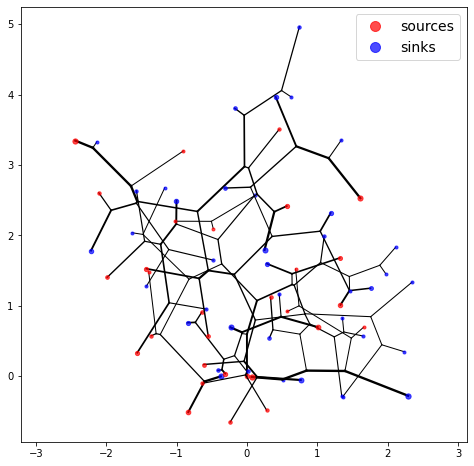

  2%|▏         | 48/3000 [00:02<02:56, 16.71it/s]


KeyboardInterrupt: 

In [5]:
# a zero temperature experiment:

np.random.seed(145)
# WLOG, use convention that we always want more sinks than sources:
num_sinks = 40 #9
num_sources = 30# 7
al = np.random.random()
al = 0.2

topo_tree, running_cost, coords_arr, bot_problem_dict = tree_growing_heuristic(num_sinks, num_sources, al, max_edge_length=1., source0_supply=100.,
                           max_source_supply_factor=1.5, num_tries=3, max_refill_counter=3,
                            N_e = 0, N_n = 0,
                           plot_final=False, plot_accepted=False, plot_alternatives=False)


al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]
topo = topo_tree.copy()
cost, coords_iter = iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                    relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=300,
                                    plot=True, title="", fov=None, save=False, save_name="img")

N = 3000
cost_arr = np.zeros(N)
for i in tqdm(range(N)):
    
    topo, cost, coords_iter, accepted = monte_carlo_step(topo, cost, coords_iter, bot_problem_dict, temperature=0)
    cost_arr[i] = cost
    

al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]

iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                     relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=300,
                                     plot=True, title="", fov=None, save=False, save_name="img")
    
plt.plot(np.arange(N), cost_arr)
plt.show()

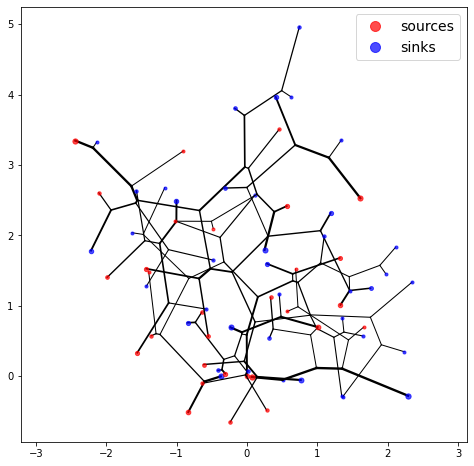

100%|██████████| 3000/3000 [02:07<00:00, 23.54it/s]


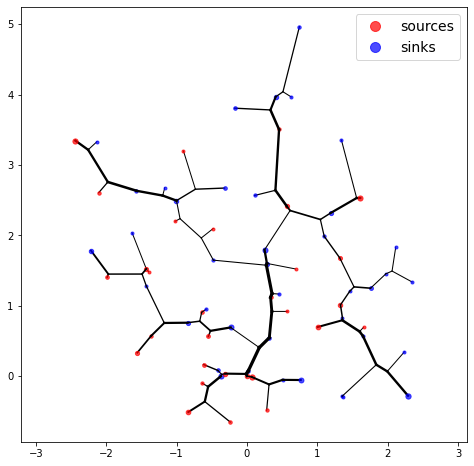

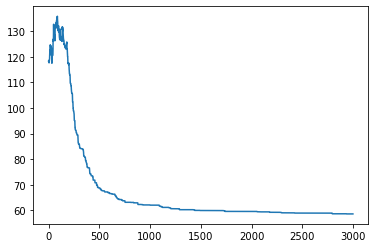

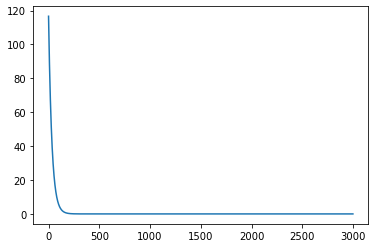

In [3]:
# a non-zero temperature experiment:

al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]
topo = topo_tree.copy()
cost, coords_iter = iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                    relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=300,
                                    plot=True, title="", fov=None, save=False, save_name="img")

N = 3000
cost_arr = np.zeros(N)
T_arr = np.zeros(N)
T = cost
for i in tqdm(range(N)):
    T = T * 0.97
    T_arr[i] = T
    topo, cost, coords_iter, accepted = monte_carlo_step(topo, cost, coords_iter, bot_problem_dict, temperature=T)
    cost_arr[i] = cost
    

al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]

iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                     relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=300,
                                     plot=True, title="", fov=None, save=False, save_name="img")
    
plt.plot(np.arange(N), cost_arr)
plt.show()

plt.plot(np.arange(N), T_arr)
plt.show()

In [ ]:
cost_arr[-1]

In [3]:
120 * 0.97**500

2.9177520251749774e-05

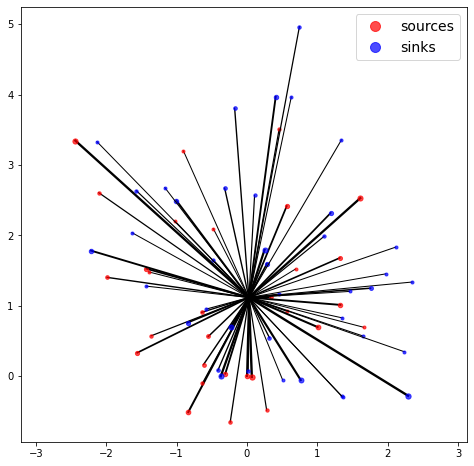

 32%|███▏      | 947/3000 [00:47<01:43, 19.81it/s]


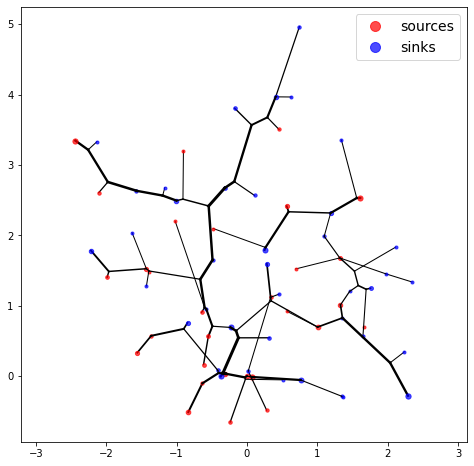

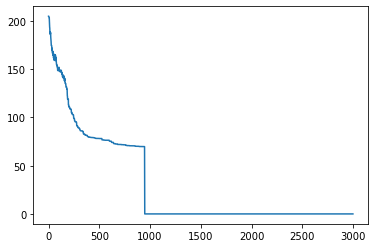

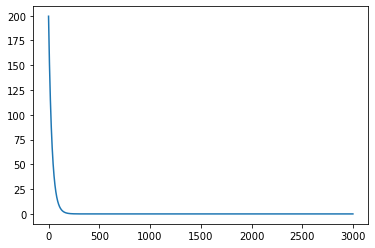

In [6]:
# now try mc updating from a star graph:
topo = nx.Graph()
for node in range(len(supply_arr) + len(demand_arr)):
    topo.add_edge(-1, node)

al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]

cost, coords_iter = iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                    relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=300,
                                    plot=True, title="", fov=None, save=False, save_name="img")

N = 3000
cost_arr = np.zeros(N)
T_arr = np.zeros(N)
T = cost
for i in tqdm(range(N)):
    T = T * 0.97
    T_arr[i] = T
    topo, cost, coords_iter, accepted = monte_carlo_step(topo, cost, coords_iter, bot_problem_dict, temperature=T)
    
    if nx.number_of_nodes(topo) == 2 * ( len(supply_arr) + len(demand_arr)) - 2:
        break
    
    cost_arr[i] = cost
    

al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]

iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                     relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=300,
                                     plot=True, title="", fov=None, save=False, save_name="img")
    
plt.plot(np.arange(N), cost_arr)
plt.show()

plt.plot(np.arange(N), T_arr)
plt.show()